# Data Preprocessing 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


1. reading the data from files and showing the first lines: 

In [2]:
df = pd.read_excel('credit-data-training.xlsx')
df.head()

,Credit-Application-Result,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Guarantors,Duration-in-Current-address,Most-valuable-available-asset,Age-years,Concurrent-Credits,Type-of-apartment,No-of-Credits-at-this-Bank,Occupation,No-of-dependents,Telephone,Foreign-Worker
0,Creditworthy,Some Balance,4,Paid Up,Other,1494,£100-£1000,< 1yr,1,NaN,2.0,1,NaN,Other Banks/Depts,2,1,1,2,1,2
1,Creditworthy,Some Balance,4,Paid Up,Home Related,1494,£100-£1000,< 1yr,1,NaN,2.0,1,29.0,Other Banks/Depts,2,1,1,2,1,2
2,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,1544,NaN,1-4 yrs,2,NaN,1.0,1,42.0,Other Banks/Depts,2,More than 1,1,2,1,1
3,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,3380,NaN,1-4 yrs,1,NaN,1.0,1,37.0,Other Banks/Depts,2,1,1,2,1,1
4,Creditworthy,No Account,6,Paid Up,Home Related,343,NaN,< 1yr,4,NaN,1.0,1,27.0,Other Banks/Depts,2,1,1,1,1,1


In [3]:
df.dtypes

Credit-Application-Result             object
Account-Balance                       object
Duration-of-Credit-Month               int64
Payment-Status-of-Previous-Credit     object
Purpose                               object
Credit-Amount                          int64
Value-Savings-Stocks                  object
Length-of-current-employment          object
Instalment-per-cent                    int64
Guarantors                            object
Duration-in-Current-address          float64
Most-valuable-available-asset          int64
Age-years                            float64
Concurrent-Credits                    object
Type-of-apartment                      int64
No-of-Credits-at-this-Bank            object
Occupation                             int64
No-of-dependents                       int64
Telephone                              int64
Foreign-Worker                         int64
dtype: object


### According to the project's specification: 



| Variable                          | Data Type |
|-----------------------------------|-----------|
| Credit-Application-Result         | String    |
| Account-Balance                   | String    |
| Duration-of-Credit-Month          | Double    |
| Payment-Status-of-Previous-Credit | String    |
| Purpose                           | String    |
| Credit-Amount                     | Double    |
| Value-Savings-Stocks              | String    |
| Length-of-current-employment      | String    |
| Instalment-per-cent               | Double    |
| Guarantors                        | String    |
| Duration-in-Current-address       | Double    |
| Most-valuable-available-asset     | Double    |
| Age-years                         | Double    |
| Concurrent-Credits                | String    |
| Type-of-apartment                 | Double    |
| No-of-Credits-at-this-Bank        | String    |
| Occupation                        | Double    |
| No-of-dependents                  | Double    |
| Telephone                         | Double    |
| Foreign-Worker                    | Double    |

So, some data transformation will be need to be done. 
# We have to values into the variable Credit-Application-Result, that we can transform into numbers

df['Credit-Application-Result'].unique()

In [4]:
df['Credit-Application-Result'] = df['Credit-Application-Result'].replace({'Creditworthy':1,'Non-Creditworthy':0})
df.head()

,Credit-Application-Result,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Guarantors,Duration-in-Current-address,Most-valuable-available-asset,Age-years,Concurrent-Credits,Type-of-apartment,No-of-Credits-at-this-Bank,Occupation,No-of-dependents,Telephone,Foreign-Worker
0,1,Some Balance,4,Paid Up,Other,1494,£100-£1000,< 1yr,1,NaN,2.0,1,NaN,Other Banks/Depts,2,1,1,2,1,2
1,1,Some Balance,4,Paid Up,Home Related,1494,£100-£1000,< 1yr,1,NaN,2.0,1,29.0,Other Banks/Depts,2,1,1,2,1,2
2,1,Some Balance,4,No Problems (in this bank),Home Related,1544,NaN,1-4 yrs,2,NaN,1.0,1,42.0,Other Banks/Depts,2,More than 1,1,2,1,1
3,1,Some Balance,4,No Problems (in this bank),Home Related,3380,NaN,1-4 yrs,1,NaN,1.0,1,37.0,Other Banks/Depts,2,1,1,2,1,1
4,1,No Account,6,Paid Up,Home Related,343,NaN,< 1yr,4,NaN,1.0,1,27.0,Other Banks/Depts,2,1,1,1,1,1


Checking the values in each categorical variable:

In [5]:
import pandas as pd

pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None) 

columns = ['Account-Balance', 'Payment-Status-of-Previous-Credit', 'Purpose', 'Value-Savings-Stocks', 'Length-of-current-employment', 'Guarantors', 'Concurrent-Credits', 'No-of-Credits-at-this-Bank']
for column_name in columns:
    unique_values = df[column_name].unique()
    print(f"Column: {column_name}\nUnique values: {unique_values}\n")


Column: Account-Balance
Unique values: ['Some Balance' 'No Account']

Column: Payment-Status-of-Previous-Credit
Unique values: ['Paid Up' 'No Problems (in this bank)' 'Some Problems']

Column: Purpose
Unique values: ['Other' 'Home Related' 'Used car' 'New car']

Column: Value-Savings-Stocks
Unique values: ['£100-£1000' nan '< £100']

Column: Length-of-current-employment
Unique values: ['< 1yr' '1-4 yrs' '4-7 yrs']

Column: Guarantors
Unique values: [nan 'Yes']

Column: Concurrent-Credits
Unique values: ['Other Banks/Depts']

Column: No-of-Credits-at-this-Bank
Unique values: ['1' 'More than 1']



In [6]:
df.describe()

,Credit-Application-Result,Duration-of-Credit-Month,Credit-Amount,Instalment-per-cent,Duration-in-Current-address,Most-valuable-available-asset,Age-years,Type-of-apartment,Occupation,No-of-dependents,Telephone,Foreign-Worker
count,500.000000,500.00000,500.000000,500.000000,156.000000,500.000000,488.000000,500.000000,500.0,500.00000,500.000000,500.000000
mean,0.716000,21.43400,3199.980000,3.010000,2.660256,2.360000,35.637295,1.928000,1.0,1.14600,1.400000,1.038000
std,0.451388,12.30742,2831.386861,1.113724,1.150017,1.064268,11.501522,0.539814,0.0,0.35346,0.490389,0.191388
min,0.000000,4.00000,276.000000,1.000000,1.000000,1.000000,19.000000,1.000000,1.0,1.00000,1.000000,1.000000
25%,0.000000,12.00000,1357.250000,2.000000,2.000000,1.000000,27.000000,2.000000,1.0,1.00000,1.000000,1.000000
50%,1.000000,18.00000,2236.500000,3.000000,2.000000,3.000000,33.000000,2.000000,1.0,1.00000,1.000000,1.000000
75%,1.000000,24.00000,3941.500000,4.000000,4.000000,3.000000,42.000000,2.000000,1.0,1.00000,2.000000,1.000000
max,1.000000,60.00000,18424.000000,4.000000,4.000000,4.000000,75.000000,3.000000,1.0,2.00000,2.000000,2.000000


In [7]:

for column_name in df.columns:
    value_counts = df[column_name].value_counts()
    print(f"Column: {column_name}\nUnique values: {value_counts}\n")

Column: Credit-Application-Result
Unique values: Credit-Application-Result
1    358
0    142
Name: count, dtype: int64

Column: Account-Balance
Unique values: Account-Balance
No Account      262
Some Balance    238
Name: count, dtype: int64

Column: Duration-of-Credit-Month
Unique values: Duration-of-Credit-Month
24    108
12     92
18     45
36     41
6      34
48     27
9      27
15     24
30     18
21     13
10     11
60      8
42      5
27      5
11      5
8       5
45      4
4       4
20      4
28      3
33      3
39      3
7       3
14      2
26      1
16      1
40      1
13      1
47      1
22      1
Name: count, dtype: int64

Column: Payment-Status-of-Previous-Credit
Unique values: Payment-Status-of-Previous-Credit
Paid Up                       260
No Problems (in this bank)    204
Some Problems                  36
Name: count, dtype: int64

Column: Purpose
Unique values: Purpose
Home Related    355
Used car         83
New car          47
Other            15
Name: count, dtype:

In [8]:
df.describe()

,Credit-Application-Result,Duration-of-Credit-Month,Credit-Amount,Instalment-per-cent,Duration-in-Current-address,Most-valuable-available-asset,Age-years,Type-of-apartment,Occupation,No-of-dependents,Telephone,Foreign-Worker
count,500.000000,500.00000,500.000000,500.000000,156.000000,500.000000,488.000000,500.000000,500.0,500.00000,500.000000,500.000000
mean,0.716000,21.43400,3199.980000,3.010000,2.660256,2.360000,35.637295,1.928000,1.0,1.14600,1.400000,1.038000
std,0.451388,12.30742,2831.386861,1.113724,1.150017,1.064268,11.501522,0.539814,0.0,0.35346,0.490389,0.191388
min,0.000000,4.00000,276.000000,1.000000,1.000000,1.000000,19.000000,1.000000,1.0,1.00000,1.000000,1.000000
25%,0.000000,12.00000,1357.250000,2.000000,2.000000,1.000000,27.000000,2.000000,1.0,1.00000,1.000000,1.000000
50%,1.000000,18.00000,2236.500000,3.000000,2.000000,3.000000,33.000000,2.000000,1.0,1.00000,1.000000,1.000000
75%,1.000000,24.00000,3941.500000,4.000000,4.000000,3.000000,42.000000,2.000000,1.0,1.00000,2.000000,1.000000
max,1.000000,60.00000,18424.000000,4.000000,4.000000,4.000000,75.000000,3.000000,1.0,2.00000,2.000000,2.000000


In [9]:
df.shape

(500, 20)

In [10]:
df.columns

Index(['Credit-Application-Result', 'Account-Balance',
       'Duration-of-Credit-Month', 'Payment-Status-of-Previous-Credit',
       'Purpose', 'Credit-Amount', 'Value-Savings-Stocks',
       'Length-of-current-employment', 'Instalment-per-cent', 'Guarantors',
       'Duration-in-Current-address', 'Most-valuable-available-asset',
       'Age-years', 'Concurrent-Credits', 'Type-of-apartment',
       'No-of-Credits-at-this-Bank', 'Occupation', 'No-of-dependents',
       'Telephone', 'Foreign-Worker'],
      dtype='object')

In [11]:
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None) 

columns = ['Account-Balance', 'Duration-of-Credit-Month', 'Foreign-Worker', 'Occupation', 'No-of-dependents','Payment-Status-of-Previous-Credit', 'Purpose', 'Value-Savings-Stocks', 'Instalment-per-cent', 'Length-of-current-employment', 'Duration-in-Current-address', 'Most-valuable-available-asset', 'Guarantors', 'Type-of-apartment', 'Concurrent-Credits', 'No-of-Credits-at-this-Bank']
for column_name in columns:
    value_count = df[column_name].value_counts()
    print(f"Column: {column_name}\nUnique values: {value_count}\n")

Column: Account-Balance
Unique values: Account-Balance
No Account      262
Some Balance    238
Name: count, dtype: int64

Column: Duration-of-Credit-Month
Unique values: Duration-of-Credit-Month
24    108
12     92
18     45
36     41
6      34
48     27
9      27
15     24
30     18
21     13
10     11
60      8
42      5
27      5
11      5
8       5
45      4
4       4
20      4
28      3
33      3
39      3
7       3
14      2
26      1
16      1
40      1
13      1
47      1
22      1
Name: count, dtype: int64

Column: Foreign-Worker
Unique values: Foreign-Worker
1    481
2     19
Name: count, dtype: int64

Column: Occupation
Unique values: Occupation
1    500
Name: count, dtype: int64

Column: No-of-dependents
Unique values: No-of-dependents
1    427
2     73
Name: count, dtype: int64

Column: Payment-Status-of-Previous-Credit
Unique values: Payment-Status-of-Previous-Credit
Paid Up                       260
No Problems (in this bank)    204
Some Problems                  36
Name

In [12]:

df_clean = df.drop(['Guarantors','Duration-in-Current-address','Concurrent-Credits','Occupation','No-of-dependents','Foreign-Worker','Telephone'],
                  axis = 1)
df_clean.head()

,Credit-Application-Result,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,No-of-Credits-at-this-Bank
0,1,Some Balance,4,Paid Up,Other,1494,£100-£1000,< 1yr,1,1,NaN,2,1
1,1,Some Balance,4,Paid Up,Home Related,1494,£100-£1000,< 1yr,1,1,29.0,2,1
2,1,Some Balance,4,No Problems (in this bank),Home Related,1544,NaN,1-4 yrs,2,1,42.0,2,More than 1
3,1,Some Balance,4,No Problems (in this bank),Home Related,3380,NaN,1-4 yrs,1,1,37.0,2,1
4,1,No Account,6,Paid Up,Home Related,343,NaN,< 1yr,4,1,27.0,2,1


In [13]:
median = df_clean['Age-years'].median()
median

33.0

In [14]:
df_clean_2 = df_clean.fillna({'Age-years':median})
df_clean_2.head()

,Credit-Application-Result,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,No-of-Credits-at-this-Bank
0,1,Some Balance,4,Paid Up,Other,1494,£100-£1000,< 1yr,1,1,33.0,2,1
1,1,Some Balance,4,Paid Up,Home Related,1494,£100-£1000,< 1yr,1,1,29.0,2,1
2,1,Some Balance,4,No Problems (in this bank),Home Related,1544,NaN,1-4 yrs,2,1,42.0,2,More than 1
3,1,Some Balance,4,No Problems (in this bank),Home Related,3380,NaN,1-4 yrs,1,1,37.0,2,1
4,1,No Account,6,Paid Up,Home Related,343,NaN,< 1yr,4,1,27.0,2,1


In [15]:
df_clean_2.describe()

,Credit-Application-Result,Duration-of-Credit-Month,Credit-Amount,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment
count,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.716000,21.43400,3199.980000,3.010000,2.360000,35.574000,1.928000
std,0.451388,12.30742,2831.386861,1.113724,1.064268,11.369567,0.539814
min,0.000000,4.00000,276.000000,1.000000,1.000000,19.000000,1.000000
25%,0.000000,12.00000,1357.250000,2.000000,1.000000,27.000000,2.000000
50%,1.000000,18.00000,2236.500000,3.000000,3.000000,33.000000,2.000000
75%,1.000000,24.00000,3941.500000,4.000000,3.000000,41.000000,2.000000
max,1.000000,60.00000,18424.000000,4.000000,4.000000,75.000000,3.000000


In [16]:
account_balance_dummies = pd.get_dummies(df_clean_2['Account-Balance'],prefix = 'Account-Balance')
payment_status_of_previous_credit = pd.get_dummies(df_clean_2['Payment-Status-of-Previous-Credit'], prefix = 'Payment-Status-of-Previous-Credit')
purpose = pd.get_dummies(df_clean_2['Purpose'], prefix = 'Purpose')
value_savings_stocks = pd.get_dummies(df_clean_2['Value-Savings-Stocks'], prefix = 'Value-Savings-Stocks')
length_of_current_employment = pd.get_dummies(df_clean_2['Length-of-current-employment'], prefix = 'Length-of-current-employment')
no_of_credits_at_this_bank = pd.get_dummies(df_clean_2['No-of-Credits-at-this-Bank'], prefix = 'No-of-Credits-at-this-Bank')

In [17]:
df_clean_dummies = pd.concat([df_clean_2, account_balance_dummies, payment_status_of_previous_credit, purpose, 
                             value_savings_stocks, length_of_current_employment, no_of_credits_at_this_bank],axis = 1)
df_clean_dummies.head()

,Credit-Application-Result,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,No-of-Credits-at-this-Bank,Account-Balance_No Account,Account-Balance_Some Balance,Payment-Status-of-Previous-Credit_No Problems (in this bank),Payment-Status-of-Previous-Credit_Paid Up,Payment-Status-of-Previous-Credit_Some Problems,Purpose_Home Related,Purpose_New car,Purpose_Other,Purpose_Used car,Value-Savings-Stocks_< £100,Value-Savings-Stocks_£100-£1000,Length-of-current-employment_1-4 yrs,Length-of-current-employment_4-7 yrs,Length-of-current-employment_< 1yr,No-of-Credits-at-this-Bank_1,No-of-Credits-at-this-Bank_More than 1
0,1,Some Balance,4,Paid Up,Other,1494,£100-£1000,< 1yr,1,1,33.0,2,1,False,True,False,True,False,False,False,True,False,False,True,False,False,True,True,False
1,1,Some Balance,4,Paid Up,Home Related,1494,£100-£1000,< 1yr,1,1,29.0,2,1,False,True,False,True,False,True,False,False,False,False,True,False,False,True,True,False
2,1,Some Balance,4,No Problems (in this bank),Home Related,1544,NaN,1-4 yrs,2,1,42.0,2,More than 1,False,True,True,False,False,True,False,False,False,False,False,True,False,False,False,True
3,1,Some Balance,4,No Problems (in this bank),Home Related,3380,NaN,1-4 yrs,1,1,37.0,2,1,False,True,True,False,False,True,False,False,False,False,False,True,False,False,True,False
4,1,No Account,6,Paid Up,Home Related,343,NaN,< 1yr,4,1,27.0,2,1,True,False,False,True,False,True,False,False,False,False,False,False,False,True,True,False


In [18]:
df_clean_dummies_2 = df_clean_dummies.drop(['Account-Balance','Payment-Status-of-Previous-Credit','Purpose','Value-Savings-Stocks','Length-of-current-employment','No-of-Credits-at-this-Bank'],
                                          axis = 1)
df_clean_dummies_2.head()

,Credit-Application-Result,Duration-of-Credit-Month,Credit-Amount,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,Account-Balance_No Account,Account-Balance_Some Balance,Payment-Status-of-Previous-Credit_No Problems (in this bank),Payment-Status-of-Previous-Credit_Paid Up,Payment-Status-of-Previous-Credit_Some Problems,Purpose_Home Related,Purpose_New car,Purpose_Other,Purpose_Used car,Value-Savings-Stocks_< £100,Value-Savings-Stocks_£100-£1000,Length-of-current-employment_1-4 yrs,Length-of-current-employment_4-7 yrs,Length-of-current-employment_< 1yr,No-of-Credits-at-this-Bank_1,No-of-Credits-at-this-Bank_More than 1
0,1,4,1494,1,1,33.0,2,False,True,False,True,False,False,False,True,False,False,True,False,False,True,True,False
1,1,4,1494,1,1,29.0,2,False,True,False,True,False,True,False,False,False,False,True,False,False,True,True,False
2,1,4,1544,2,1,42.0,2,False,True,True,False,False,True,False,False,False,False,False,True,False,False,False,True
3,1,4,3380,1,1,37.0,2,False,True,True,False,False,True,False,False,False,False,False,True,False,False,True,False
4,1,6,343,4,1,27.0,2,True,False,False,True,False,True,False,False,False,False,False,False,False,True,True,False


,Credit-Application-Result,Duration-of-Credit-Month,Credit-Amount,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,Account-Balance_No Account,Account-Balance_Some Balance,Payment-Status-of-Previous-Credit_No Problems (in this bank),Payment-Status-of-Previous-Credit_Paid Up,Payment-Status-of-Previous-Credit_Some Problems,Purpose_Home Related,Purpose_New car,Purpose_Other,Purpose_Used car,Value-Savings-Stocks_< £100,Value-Savings-Stocks_£100-£1000,Length-of-current-employment_1-4 yrs,Length-of-current-employment_4-7 yrs,Length-of-current-employment_< 1yr,No-of-Credits-at-this-Bank_1,No-of-Credits-at-this-Bank_More than 1
Credit-Application-Result,1.000000,-0.202504,-0.201946,-0.062107,-0.141332,0.052914,-0.026516,-0.316080,0.316080,0.143815,-0.010298,-0.253531,-0.099502,0.096477,0.032760,0.030658,0.024571,0.160782,0.073444,0.053569,-0.105061,-0.056549,0.056549
Duration-of-Credit-Month,-0.202504,1.000000,0.573980,0.068106,0.299855,-0.064197,0.152516,0.101065,-0.101065,0.044174,-0.109998,0.128614,-0.001101,0.124637,-0.020511,-0.087009,0.047028,-0.012274,-0.001274,0.010993,-0.008544,0.019696,-0.019696
Credit-Amount,-0.201946,0.573980,1.000000,-0.288852,0.325545,0.069316,0.170071,0.133727,-0.133727,0.026926,-0.071926,0.087823,-0.096822,0.227785,0.004420,-0.062605,0.008319,-0.011770,-0.063192,-0.006467,0.055939,0.053785,-0.053785
Instalment-per-cent,-0.062107,0.068106,-0.288852,1.000000,0.081493,0.039270,0.074533,-0.070618,0.070618,0.036430,-0.041737,0.011405,0.112705,-0.095290,0.051107,-0.086139,0.027581,0.009578,0.018320,0.153013,-0.147643,-0.056923,0.056923
Most-valuable-available-asset,-0.141332,0.299855,0.325545,0.081493,1.000000,0.086233,0.373101,0.006328,-0.006328,0.040419,-0.100155,0.116729,-0.053063,0.148772,-0.048520,-0.029727,0.113151,-0.034390,0.019409,0.132246,-0.130451,-0.024298,0.024298
Age-years,0.052914,-0.064197,0.069316,0.039270,0.086233,1.000000,0.329350,-0.074178,0.074178,0.188066,-0.166441,-0.035875,0.053641,0.066989,-0.015081,-0.111043,-0.048148,0.057442,-0.126767,0.375459,-0.225553,-0.124242,0.124242
Type-of-apartment,-0.026516,0.152516,0.170071,0.074533,0.373101,0.329350,1.000000,-0.090121,0.090121,0.110839,-0.091158,-0.034549,0.045443,0.043005,-0.041742,-0.070011,-0.032027,-0.023393,-0.084560,0.162551,-0.074021,-0.053776,0.053776
Account-Balance_No Account,-0.316080,0.101065,0.133727,-0.070618,0.006328,-0.074178,-0.090121,1.000000,-1.000000,-0.153971,0.046170,0.203509,0.035125,-0.063508,-0.020189,0.016230,0.052309,-0.231568,0.052378,-0.101782,0.046802,0.094442,-0.094442
Account-Balance_Some Balance,0.316080,-0.101065,-0.133727,0.070618,-0.006328,0.074178,0.090121,-1.000000,1.000000,0.153971,-0.046170,-0.203509,-0.035125,0.063508,0.020189,-0.016230,-0.052309,0.231568,-0.052378,0.101782,-0.046802,-0.094442,0.094442
Payment-Status-of-Previous-Credit_No Problems (in this bank),0.143815,0.044174,0.026926,0.036430,0.040419,0.188066,0.110839,-0.153971,0.153971,1.000000,-0.864073,-0.231239,0.001435,0.053325,0.020993,-0.053198,0.005747,0.045555,-0.005928,0.126348,-0.105149,-0.615170,0.615170


<Axes: >

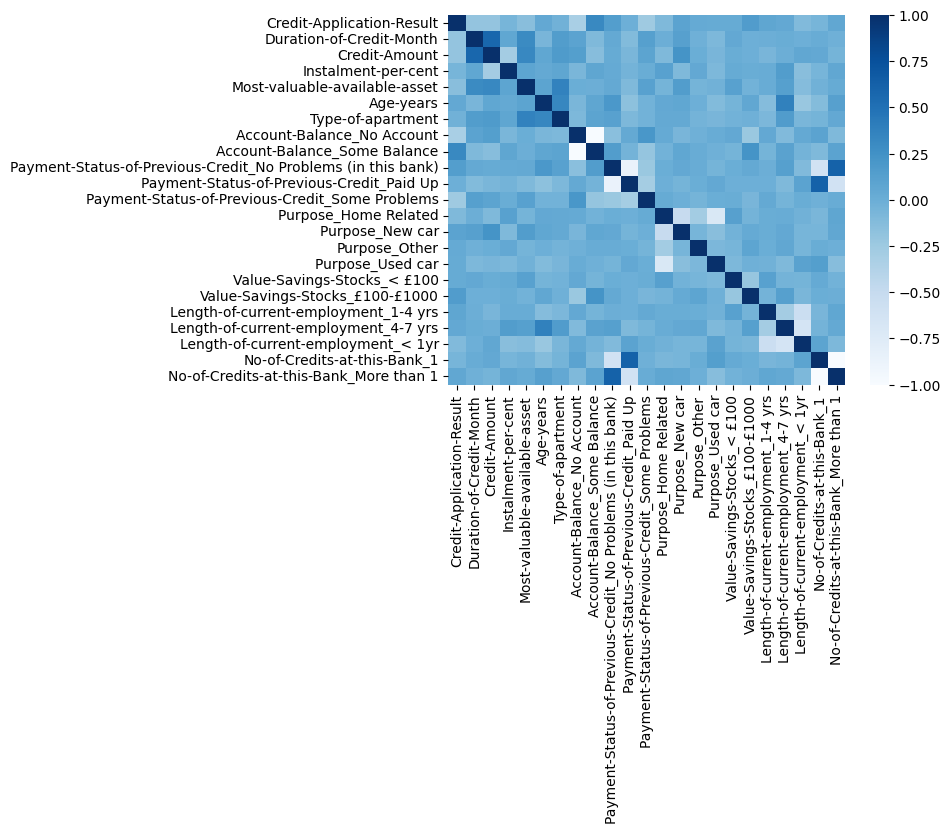

In [19]:

corr = df_clean_dummies_2.corr()
display(corr)

sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, cmap = 'Blues')

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [21]:
df_logistic_data = df_clean_dummies_2.copy()

In [22]:
Y = df_logistic_data['Credit-Application-Result']
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Credit-Application-Result, dtype: int64

In [23]:
X = df_logistic_data.drop('Credit-Application-Result', axis = 1)
X.head()

,Duration-of-Credit-Month,Credit-Amount,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,Account-Balance_No Account,Account-Balance_Some Balance,Payment-Status-of-Previous-Credit_No Problems (in this bank),Payment-Status-of-Previous-Credit_Paid Up,Payment-Status-of-Previous-Credit_Some Problems,Purpose_Home Related,Purpose_New car,Purpose_Other,Purpose_Used car,Value-Savings-Stocks_< £100,Value-Savings-Stocks_£100-£1000,Length-of-current-employment_1-4 yrs,Length-of-current-employment_4-7 yrs,Length-of-current-employment_< 1yr,No-of-Credits-at-this-Bank_1,No-of-Credits-at-this-Bank_More than 1
0,4,1494,1,1,33.0,2,False,True,False,True,False,False,False,True,False,False,True,False,False,True,True,False
1,4,1494,1,1,29.0,2,False,True,False,True,False,True,False,False,False,False,True,False,False,True,True,False
2,4,1544,2,1,42.0,2,False,True,True,False,False,True,False,False,False,False,False,True,False,False,False,True
3,4,3380,1,1,37.0,2,False,True,True,False,False,True,False,False,False,False,False,True,False,False,True,False
4,6,343,4,1,27.0,2,True,False,False,True,False,True,False,False,False,False,False,False,False,True,True,False


In [24]:
X_train_lr, X_test_lr, Y_train_lr, Y_test_lr = train_test_split(X, Y, test_size = 0.3)

In [25]:
X_train_lr.columns

Index(['Duration-of-Credit-Month', 'Credit-Amount', 'Instalment-per-cent',
       'Most-valuable-available-asset', 'Age-years', 'Type-of-apartment',
       'Account-Balance_No Account', 'Account-Balance_Some Balance',
       'Payment-Status-of-Previous-Credit_No Problems (in this bank)',
       'Payment-Status-of-Previous-Credit_Paid Up',
       'Payment-Status-of-Previous-Credit_Some Problems',
       'Purpose_Home Related', 'Purpose_New car', 'Purpose_Other',
       'Purpose_Used car', 'Value-Savings-Stocks_< £100',
       'Value-Savings-Stocks_£100-£1000',
       'Length-of-current-employment_1-4 yrs',
       'Length-of-current-employment_4-7 yrs',
       'Length-of-current-employment_< 1yr', 'No-of-Credits-at-this-Bank_1',
       'No-of-Credits-at-this-Bank_More than 1'],
      dtype='object')

In [26]:
logistic_model = LogisticRegression()

In [27]:
logistic_model.fit(X_train_lr, Y_train_lr)

/Users/daianeucelli/UdacityPredictiveAnalytics/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
logistic_model.score(X_test_lr, Y_test_lr)

0.78

In [29]:
customers = pd.read_excel('customers-to-score.xlsx')
customers.head()

,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Guarantors,Duration-in-Current-address,Most-valuable-available-asset,Age-years,Concurrent-Credits,Type-of-apartment,No-of-Credits-at-this-Bank,Occupation,No-of-dependents,Telephone,Foreign-Worker
0,No Account,9,No Problems (in this bank),Home Related,2799,NaN,< 1yr,2,NaN,2,1,36,Other Banks/Depts,1,More than 1,1,2,1,1
1,No Account,12,No Problems (in this bank),Home Related,2122,NaN,< 1yr,3,NaN,2,1,39,Other Banks/Depts,1,More than 1,1,2,1,2
2,No Account,24,Paid Up,Home Related,3758,£100-£1000,< 1yr,1,NaN,4,4,23,Other Banks/Depts,1,1,1,1,1,1
3,No Account,11,No Problems (in this bank),Home Related,3905,NaN,< 1yr,2,NaN,2,1,36,Other Banks/Depts,1,More than 1,1,2,1,1
4,No Account,6,No Problems (in this bank),Home Related,1957,NaN,1-4 yrs,1,NaN,4,3,31,Other Banks/Depts,2,1,1,1,1,1


In [30]:
customers2 = customers.drop(['Guarantors','Duration-in-Current-address','Concurrent-Credits','Occupation','No-of-dependents','Foreign-Worker','Telephone'],
                  axis = 1)
customers2.head()

,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,No-of-Credits-at-this-Bank
0,No Account,9,No Problems (in this bank),Home Related,2799,NaN,< 1yr,2,1,36,1,More than 1
1,No Account,12,No Problems (in this bank),Home Related,2122,NaN,< 1yr,3,1,39,1,More than 1
2,No Account,24,Paid Up,Home Related,3758,£100-£1000,< 1yr,1,4,23,1,1
3,No Account,11,No Problems (in this bank),Home Related,3905,NaN,< 1yr,2,1,36,1,More than 1
4,No Account,6,No Problems (in this bank),Home Related,1957,NaN,1-4 yrs,1,3,31,2,1


In [31]:
account_balance_dummies = pd.get_dummies(customers2['Account-Balance'],prefix = 'Account-Balance')
payment_status_of_previous_credit = pd.get_dummies(customers2['Payment-Status-of-Previous-Credit'], prefix = 'Payment-Status-of-Previous-Credit')
purpose = pd.get_dummies(customers2['Purpose'], prefix = 'Purpose')
value_savings_stocks = pd.get_dummies(customers2['Value-Savings-Stocks'], prefix = 'Value-Savings-Stocks')
length_of_current_employment = pd.get_dummies(customers2['Length-of-current-employment'], prefix = 'Length-of-current-employment')
no_of_credits_at_this_bank = pd.get_dummies(customers2['No-of-Credits-at-this-Bank'], prefix = 'No-of-Credits-at-this-Bank')

In [32]:

customers_with_dummies = pd.concat([customers2, account_balance_dummies, payment_status_of_previous_credit, purpose, 
                             value_savings_stocks, length_of_current_employment, no_of_credits_at_this_bank], axis = 1)
customers_with_dummies.head()

,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,No-of-Credits-at-this-Bank,Account-Balance_No Account,Account-Balance_Some Balance,Payment-Status-of-Previous-Credit_No Problems (in this bank),Payment-Status-of-Previous-Credit_Paid Up,Payment-Status-of-Previous-Credit_Some Problems,Purpose_Home Related,Purpose_New car,Purpose_Used car,Value-Savings-Stocks_< £100,Value-Savings-Stocks_£100-£1000,Length-of-current-employment_1-4 yrs,Length-of-current-employment_4-7 yrs,Length-of-current-employment_< 1yr,No-of-Credits-at-this-Bank_1,No-of-Credits-at-this-Bank_More than 1
0,No Account,9,No Problems (in this bank),Home Related,2799,NaN,< 1yr,2,1,36,1,More than 1,True,False,True,False,False,True,False,False,False,False,False,False,True,False,True
1,No Account,12,No Problems (in this bank),Home Related,2122,NaN,< 1yr,3,1,39,1,More than 1,True,False,True,False,False,True,False,False,False,False,False,False,True,False,True
2,No Account,24,Paid Up,Home Related,3758,£100-£1000,< 1yr,1,4,23,1,1,True,False,False,True,False,True,False,False,False,True,False,False,True,True,False
3,No Account,11,No Problems (in this bank),Home Related,3905,NaN,< 1yr,2,1,36,1,More than 1,True,False,True,False,False,True,False,False,False,False,False,False,True,False,True
4,No Account,6,No Problems (in this bank),Home Related,1957,NaN,1-4 yrs,1,3,31,2,1,True,False,True,False,False,True,False,False,False,False,True,False,False,True,False


In [33]:
customers_clean = customers_with_dummies.drop(['Account-Balance','Payment-Status-of-Previous-Credit','Purpose','Value-Savings-Stocks','Length-of-current-employment','No-of-Credits-at-this-Bank'],
                                          axis = 1)
customers_clean.head()

,Duration-of-Credit-Month,Credit-Amount,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,Account-Balance_No Account,Account-Balance_Some Balance,Payment-Status-of-Previous-Credit_No Problems (in this bank),Payment-Status-of-Previous-Credit_Paid Up,Payment-Status-of-Previous-Credit_Some Problems,Purpose_Home Related,Purpose_New car,Purpose_Used car,Value-Savings-Stocks_< £100,Value-Savings-Stocks_£100-£1000,Length-of-current-employment_1-4 yrs,Length-of-current-employment_4-7 yrs,Length-of-current-employment_< 1yr,No-of-Credits-at-this-Bank_1,No-of-Credits-at-this-Bank_More than 1
0,9,2799,2,1,36,1,True,False,True,False,False,True,False,False,False,False,False,False,True,False,True
1,12,2122,3,1,39,1,True,False,True,False,False,True,False,False,False,False,False,False,True,False,True
2,24,3758,1,4,23,1,True,False,False,True,False,True,False,False,False,True,False,False,True,True,False
3,11,3905,2,1,36,1,True,False,True,False,False,True,False,False,False,False,False,False,True,False,True
4,6,1957,1,3,31,2,True,False,True,False,False,True,False,False,False,False,True,False,False,True,False


In [34]:
customers_clean['Purpose_Other'] = 0
customers_clean['Purpose_Other'].head()

0    0
1    0
2    0
3    0
4    0
Name: Purpose_Other, dtype: int64

['Duration-of-Credit-Month', 'Credit-Amount', 'Instalment-per-cent',
       'Most-valuable-available-asset', 'Age-years', 'Type-of-apartment',
       'Account-Balance_No Account', 'Account-Balance_Some Balance',
       'Payment-Status-of-Previous-Credit_No Problems (in this bank)',
       'Payment-Status-of-Previous-Credit_Paid Up',
       'Payment-Status-of-Previous-Credit_Some Problems',
       'Purpose_Home Related', 'Purpose_New car', 'Purpose_Other',
       'Purpose_Used car', 'Value-Savings-Stocks_< £100',
       'Value-Savings-Stocks_£100-£1000',
       'Length-of-current-employment_1-4 yrs',
       'Length-of-current-employment_4-7 yrs',
       'Length-of-current-employment_< 1yr', 'No-of-Credits-at-this-Bank_1',
       'No-of-Credits-at-this-Bank_More than 1']

In [35]:
customers_clean.columns

Index(['Duration-of-Credit-Month', 'Credit-Amount', 'Instalment-per-cent',
       'Most-valuable-available-asset', 'Age-years', 'Type-of-apartment',
       'Account-Balance_No Account', 'Account-Balance_Some Balance',
       'Payment-Status-of-Previous-Credit_No Problems (in this bank)',
       'Payment-Status-of-Previous-Credit_Paid Up',
       'Payment-Status-of-Previous-Credit_Some Problems',
       'Purpose_Home Related', 'Purpose_New car', 'Purpose_Used car',
       'Value-Savings-Stocks_< £100', 'Value-Savings-Stocks_£100-£1000',
       'Length-of-current-employment_1-4 yrs',
       'Length-of-current-employment_4-7 yrs',
       'Length-of-current-employment_< 1yr', 'No-of-Credits-at-this-Bank_1',
       'No-of-Credits-at-this-Bank_More than 1', 'Purpose_Other'],
      dtype='object')

In [37]:
customers_clean = customers_clean[['Duration-of-Credit-Month', 'Credit-Amount', 'Instalment-per-cent',
       'Most-valuable-available-asset', 'Age-years', 'Type-of-apartment',
       'Account-Balance_No Account', 'Account-Balance_Some Balance',
       'Payment-Status-of-Previous-Credit_No Problems (in this bank)',
       'Payment-Status-of-Previous-Credit_Paid Up',
       'Payment-Status-of-Previous-Credit_Some Problems',
       'Purpose_Home Related', 'Purpose_New car', 'Purpose_Other',
       'Purpose_Used car', 'Value-Savings-Stocks_< £100',
       'Value-Savings-Stocks_£100-£1000',
       'Length-of-current-employment_1-4 yrs',
       'Length-of-current-employment_4-7 yrs',
       'Length-of-current-employment_< 1yr', 'No-of-Credits-at-this-Bank_1',
       'No-of-Credits-at-this-Bank_More than 1']]

## Logistic regression model prediction

In [38]:
logistic_predict = logistic_model.predict(customers_clean)
logistic_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

## Decision Tree

In [39]:
from sklearn.preprocessing import LabelEncoder
from sklearn import tree

In [40]:
decision_tree_data = df_clean_2.copy()
decision_tree_data.head()

,Credit-Application-Result,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,No-of-Credits-at-this-Bank
0,1,Some Balance,4,Paid Up,Other,1494,£100-£1000,< 1yr,1,1,33.0,2,1
1,1,Some Balance,4,Paid Up,Home Related,1494,£100-£1000,< 1yr,1,1,29.0,2,1
2,1,Some Balance,4,No Problems (in this bank),Home Related,1544,NaN,1-4 yrs,2,1,42.0,2,More than 1
3,1,Some Balance,4,No Problems (in this bank),Home Related,3380,NaN,1-4 yrs,1,1,37.0,2,1
4,1,No Account,6,Paid Up,Home Related,343,NaN,< 1yr,4,1,27.0,2,1


In [41]:
inputs = decision_tree_data.drop("Credit-Application-Result", axis = 1)
target = decision_tree_data['Credit-Application-Result']

In [42]:
inputs.head()

,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,No-of-Credits-at-this-Bank
0,Some Balance,4,Paid Up,Other,1494,£100-£1000,< 1yr,1,1,33.0,2,1
1,Some Balance,4,Paid Up,Home Related,1494,£100-£1000,< 1yr,1,1,29.0,2,1
2,Some Balance,4,No Problems (in this bank),Home Related,1544,NaN,1-4 yrs,2,1,42.0,2,More than 1
3,Some Balance,4,No Problems (in this bank),Home Related,3380,NaN,1-4 yrs,1,1,37.0,2,1
4,No Account,6,Paid Up,Home Related,343,NaN,< 1yr,4,1,27.0,2,1


In [43]:
target.head()

0    1
1    1
2    1
3    1
4    1
Name: Credit-Application-Result, dtype: int64

In [44]:
account_balance = LabelEncoder()
duration_of_credit_month = LabelEncoder()
payment_status_of_previous_credit = LabelEncoder()
purpose = LabelEncoder()
credit_amount = LabelEncoder()
value_savings_stocks = LabelEncoder()
length_of_current_employment = LabelEncoder()
instalment_percent = LabelEncoder()
most_valuable_available_asset = LabelEncoder()
age_years = LabelEncoder()
type_of_apartment = LabelEncoder()
no_of_credits_at_this_bank = LabelEncoder()

In [45]:
inputs['Account-Balance_n'] = account_balance.fit_transform(inputs['Account-Balance'])
inputs['Payment-Status-of-Previous-Credit_n'] = payment_status_of_previous_credit.fit_transform(inputs['Payment-Status-of-Previous-Credit'])
inputs['Purpose_n'] = purpose.fit_transform(inputs['Purpose'])
inputs['Value-Savings-Stocks_n'] = value_savings_stocks.fit_transform(inputs['Value-Savings-Stocks'])
inputs['Length-of-current-employment_n'] = length_of_current_employment.fit_transform(inputs['Length-of-current-employment'])
inputs['No-of-Credits-at-this-Bank_n'] = no_of_credits_at_this_bank.fit_transform(inputs['No-of-Credits-at-this-Bank'])

In [46]:
inputs.head()

,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,No-of-Credits-at-this-Bank,Account-Balance_n,Payment-Status-of-Previous-Credit_n,Purpose_n,Value-Savings-Stocks_n,Length-of-current-employment_n,No-of-Credits-at-this-Bank_n
0,Some Balance,4,Paid Up,Other,1494,£100-£1000,< 1yr,1,1,33.0,2,1,1,1,2,1,2,0
1,Some Balance,4,Paid Up,Home Related,1494,£100-£1000,< 1yr,1,1,29.0,2,1,1,1,0,1,2,0
2,Some Balance,4,No Problems (in this bank),Home Related,1544,NaN,1-4 yrs,2,1,42.0,2,More than 1,1,0,0,2,0,1
3,Some Balance,4,No Problems (in this bank),Home Related,3380,NaN,1-4 yrs,1,1,37.0,2,1,1,0,0,2,0,0
4,No Account,6,Paid Up,Home Related,343,NaN,< 1yr,4,1,27.0,2,1,0,1,0,2,2,0


In [47]:
inputs_n = inputs.drop(['Account-Balance','Payment-Status-of-Previous-Credit','Purpose','Value-Savings-Stocks','Length-of-current-employment','No-of-Credits-at-this-Bank'],
                      axis = 1)
inputs_n.head()

,Duration-of-Credit-Month,Credit-Amount,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,Account-Balance_n,Payment-Status-of-Previous-Credit_n,Purpose_n,Value-Savings-Stocks_n,Length-of-current-employment_n,No-of-Credits-at-this-Bank_n
0,4,1494,1,1,33.0,2,1,1,2,1,2,0
1,4,1494,1,1,29.0,2,1,1,0,1,2,0
2,4,1544,2,1,42.0,2,1,0,0,2,0,1
3,4,3380,1,1,37.0,2,1,0,0,2,0,0
4,6,343,4,1,27.0,2,0,1,0,2,2,0


In [48]:

X_train_dt, X_test_dt, Y_train_dt, Y_test_dt = train_test_split(inputs_n, target, test_size = 0.3)

In [49]:
len(X_train_dt)

350

In [50]:
tree_model = tree.DecisionTreeClassifier()

In [51]:
tree_model.fit(X_train_dt, Y_train_dt)

DecisionTreeClassifier()

In [52]:
tree_model.score(X_test_dt, Y_test_dt)

0.6733333333333333

## Make Decision Tree Prediction

In [53]:
customers3 = customers2.copy()
customers3.head()

,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,No-of-Credits-at-this-Bank
0,No Account,9,No Problems (in this bank),Home Related,2799,NaN,< 1yr,2,1,36,1,More than 1
1,No Account,12,No Problems (in this bank),Home Related,2122,NaN,< 1yr,3,1,39,1,More than 1
2,No Account,24,Paid Up,Home Related,3758,£100-£1000,< 1yr,1,4,23,1,1
3,No Account,11,No Problems (in this bank),Home Related,3905,NaN,< 1yr,2,1,36,1,More than 1
4,No Account,6,No Problems (in this bank),Home Related,1957,NaN,1-4 yrs,1,3,31,2,1


In [54]:
customers3['Account-Balance_n'] = account_balance.fit_transform(customers3['Account-Balance'])
customers3['Payment-Status-of-Previous-Credit_n'] = payment_status_of_previous_credit.fit_transform(customers3['Payment-Status-of-Previous-Credit'])
customers3['Purpose_n'] = purpose.fit_transform(customers3['Purpose'])
customers3['Value-Savings-Stocks_n'] = value_savings_stocks.fit_transform(customers3['Value-Savings-Stocks'])
customers3['Length-of-current-employment_n'] = length_of_current_employment.fit_transform(customers3['Length-of-current-employment'])
customers3['No-of-Credits-at-this-Bank_n'] = no_of_credits_at_this_bank.fit_transform(customers3['No-of-Credits-at-this-Bank'])

In [55]:
customers3.head()

,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,No-of-Credits-at-this-Bank,Account-Balance_n,Payment-Status-of-Previous-Credit_n,Purpose_n,Value-Savings-Stocks_n,Length-of-current-employment_n,No-of-Credits-at-this-Bank_n
0,No Account,9,No Problems (in this bank),Home Related,2799,NaN,< 1yr,2,1,36,1,More than 1,0,0,0,2,2,1
1,No Account,12,No Problems (in this bank),Home Related,2122,NaN,< 1yr,3,1,39,1,More than 1,0,0,0,2,2,1
2,No Account,24,Paid Up,Home Related,3758,£100-£1000,< 1yr,1,4,23,1,1,0,1,0,1,2,0
3,No Account,11,No Problems (in this bank),Home Related,3905,NaN,< 1yr,2,1,36,1,More than 1,0,0,0,2,2,1
4,No Account,6,No Problems (in this bank),Home Related,1957,NaN,1-4 yrs,1,3,31,2,1,0,0,0,2,0,0


In [56]:
customers3_n = customers3.drop(['Account-Balance','Payment-Status-of-Previous-Credit','Purpose','Value-Savings-Stocks','Length-of-current-employment','No-of-Credits-at-this-Bank'],
                      axis = 1)
customers3_n.head()

,Duration-of-Credit-Month,Credit-Amount,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,Account-Balance_n,Payment-Status-of-Previous-Credit_n,Purpose_n,Value-Savings-Stocks_n,Length-of-current-employment_n,No-of-Credits-at-this-Bank_n
0,9,2799,2,1,36,1,0,0,0,2,2,1
1,12,2122,3,1,39,1,0,0,0,2,2,1
2,24,3758,1,4,23,1,0,1,0,1,2,0
3,11,3905,2,1,36,1,0,0,0,2,2,1
4,6,1957,1,3,31,2,0,0,0,2,0,0


In [57]:
decision_tree_predict = tree_model.predict(customers3_n)
decision_tree_predict

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,

## Forest Model

In [58]:

from sklearn.ensemble import RandomForestClassifier

inputs_n.head()

,Duration-of-Credit-Month,Credit-Amount,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,Account-Balance_n,Payment-Status-of-Previous-Credit_n,Purpose_n,Value-Savings-Stocks_n,Length-of-current-employment_n,No-of-Credits-at-this-Bank_n
0,4,1494,1,1,33.0,2,1,1,2,1,2,0
1,4,1494,1,1,29.0,2,1,1,0,1,2,0
2,4,1544,2,1,42.0,2,1,0,0,2,0,1
3,4,3380,1,1,37.0,2,1,0,0,2,0,0
4,6,343,4,1,27.0,2,0,1,0,2,2,0


In [59]:
target.head()

0    1
1    1
2    1
3    1
4    1
Name: Credit-Application-Result, dtype: int64

In [60]:
X_train_f, X_test_f, Y_train_f, Y_test_f = train_test_split(inputs_n, target, test_size = 0.3)

In [61]:
forest_model = RandomForestClassifier(n_estimators = 40)

In [62]:
forest_model.fit(X_train_f, Y_train_f)

RandomForestClassifier(n_estimators=40)

In [63]:
forest_model.score(X_test_f, Y_test_f)

0.7266666666666667

In [64]:
customers3_n.head()

,Duration-of-Credit-Month,Credit-Amount,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,Account-Balance_n,Payment-Status-of-Previous-Credit_n,Purpose_n,Value-Savings-Stocks_n,Length-of-current-employment_n,No-of-Credits-at-this-Bank_n
0,9,2799,2,1,36,1,0,0,0,2,2,1
1,12,2122,3,1,39,1,0,0,0,2,2,1
2,24,3758,1,4,23,1,0,1,0,1,2,0
3,11,3905,2,1,36,1,0,0,0,2,2,1
4,6,1957,1,3,31,2,0,0,0,2,0,0


In [65]:
forest_predict = forest_model.predict(customers3_n)
forest_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,

## Boosted Forest

In [67]:
from xgboost import XGBClassifier

In [68]:
X_train_bf, X_test_bf, Y_train_bf, Y_test_bf = train_test_split(inputs_n, target, test_size = 0.3)

In [69]:
boost_model = XGBClassifier()

In [70]:
boost_model.fit(X_train_bf, Y_train_bf)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [71]:
boost_model.score(X_test_bf, Y_test_bf)

0.7133333333333334

In [72]:
boost_predict = boost_model.predict(customers3_n)
boost_predict

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,

## Model Evaluation

### ROC curve

In [73]:

from sklearn.metrics import roc_curve, roc_auc_score

In [74]:
# calculate the prediction probabilities
lr_probs = logistic_model.predict_proba(X_test_lr)
dt_probs = tree_model.predict_proba(X_test_dt)
f_probs = forest_model.predict_proba(X_test_f)
bf_probs = boost_model.predict_proba(X_test_bf)

In [75]:
#calculate AUROC score
lr_auc = roc_auc_score(Y_test_lr, lr_probs[:,1])
dt_auc = roc_auc_score(Y_test_dt, dt_probs[:,1])
f_auc = roc_auc_score(Y_test_f, f_probs[:,1])
bf_auc = roc_auc_score(Y_test_bf,bf_probs[:,1])

In [76]:
print('Logistic Regression AUROC = {:.3f}'.format(lr_auc))
print('Decision Tree AUROC = {:.3f}'.format(dt_auc))
print('Forest Model AUROC = {:.3f}'.format(f_auc))
print('Boosted Forest AUROC = {:.3f}'.format(bf_auc))

Logistic Regression AUROC = 0.731
Decision Tree AUROC = 0.588
Forest Model AUROC = 0.646
Boosted Forest AUROC = 0.705


In [77]:
#calculate ROC curve
lr_fpr, lr_tpr, _ = roc_curve(Y_test_lr, lr_probs[:,1])
dt_fpr, dt_tpr, _ = roc_curve(Y_test_dt, dt_probs[:,1])
f_fpr, f_tpr, _ = roc_curve(Y_test_f, f_probs[:,1])
bf_fpr, bf_tpr, _ = roc_curve(Y_test_bf, bf_probs[:,1])

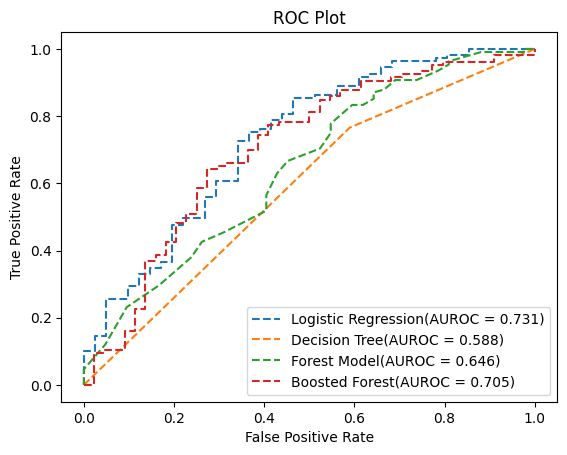

In [78]:
plt.plot(lr_fpr, lr_tpr, linestyle = '--', label = 'Logistic Regression(AUROC = {:.3f})'.format(lr_auc))
plt.plot(dt_fpr, dt_tpr, linestyle = '--', label = 'Decision Tree(AUROC = {:.3f})'.format(dt_auc))
plt.plot(f_fpr, f_tpr, linestyle = '--', label = 'Forest Model(AUROC = {:.3f})'.format(f_auc))
plt.plot(bf_fpr, bf_tpr, linestyle = '--', label = 'Boosted Forest(AUROC = {:.3f})'.format(bf_auc))

#Title
plt.title('ROC Plot')
#Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#Show legend
plt.legend()

plt.show()

## Confusion matrix

In [79]:
from sklearn.metrics import confusion_matrix, classification_report

In [80]:
# Source code credit for this function: https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize = 14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(confusion_matrix,
                        index=class_names, columns = class_names)
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot = True, fmt = 'd')
    except ValueError:
        raise ValueError('Confusion matrix values must be integers.')
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation = 0, ha = 'right', fontsize = fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation = 45, ha = 'right', fontsize = fontsize)
    plt.ylabel('Truth')
    plt.xlabel('Prediction')

In [81]:
lr_truth = Y_test_lr
lr_prediction = logistic_model.predict(X_test_lr)

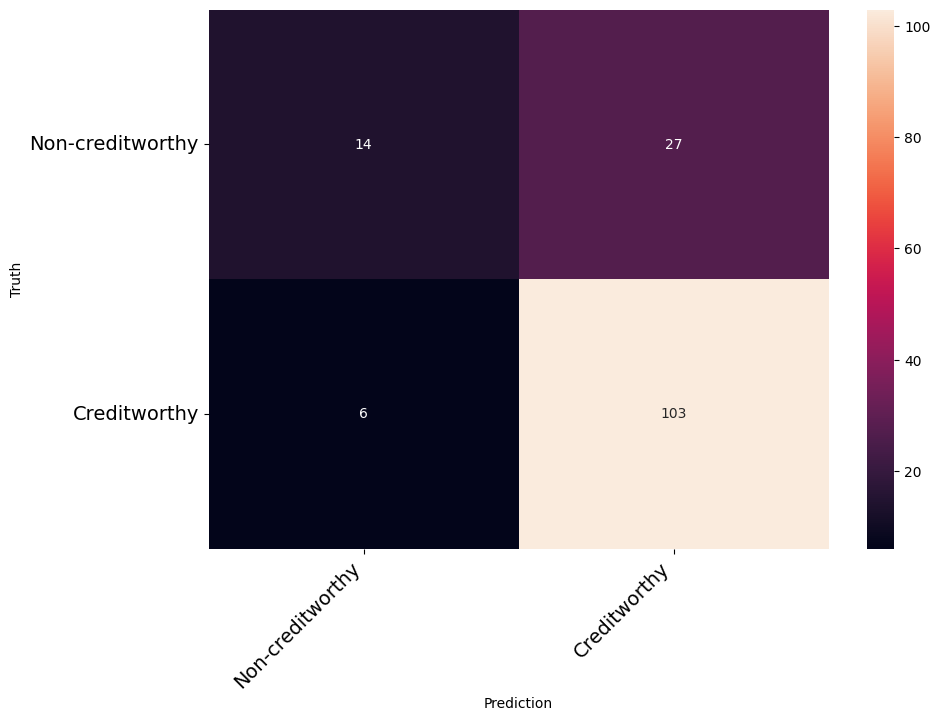

In [82]:
cm_lr = confusion_matrix(lr_truth, lr_prediction)
print_confusion_matrix(cm_lr,['Non-creditworthy','Creditworthy'])

In [83]:
print(classification_report(lr_truth, lr_prediction))

              precision    recall  f1-score   support

           0       0.70      0.34      0.46        41
           1       0.79      0.94      0.86       109

    accuracy                           0.78       150
   macro avg       0.75      0.64      0.66       150
weighted avg       0.77      0.78      0.75       150



In [84]:
dt_truth = Y_test_dt
dt_prediction = tree_model.predict(X_test_dt)

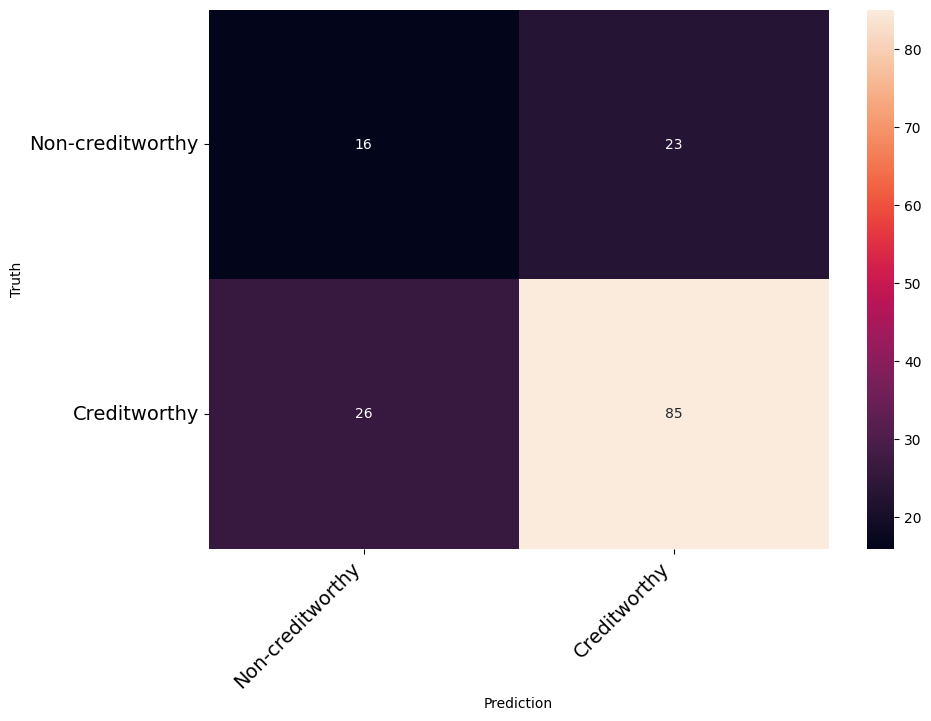

In [85]:

cm_dt = confusion_matrix(dt_truth, dt_prediction)
print_confusion_matrix(cm_dt,['Non-creditworthy','Creditworthy'])

In [86]:
print(classification_report(dt_truth, dt_prediction))

              precision    recall  f1-score   support

           0       0.38      0.41      0.40        39
           1       0.79      0.77      0.78       111

    accuracy                           0.67       150
   macro avg       0.58      0.59      0.59       150
weighted avg       0.68      0.67      0.68       150



In [87]:
f_truth = Y_test_f
f_prediction = forest_model.predict(X_test_f)

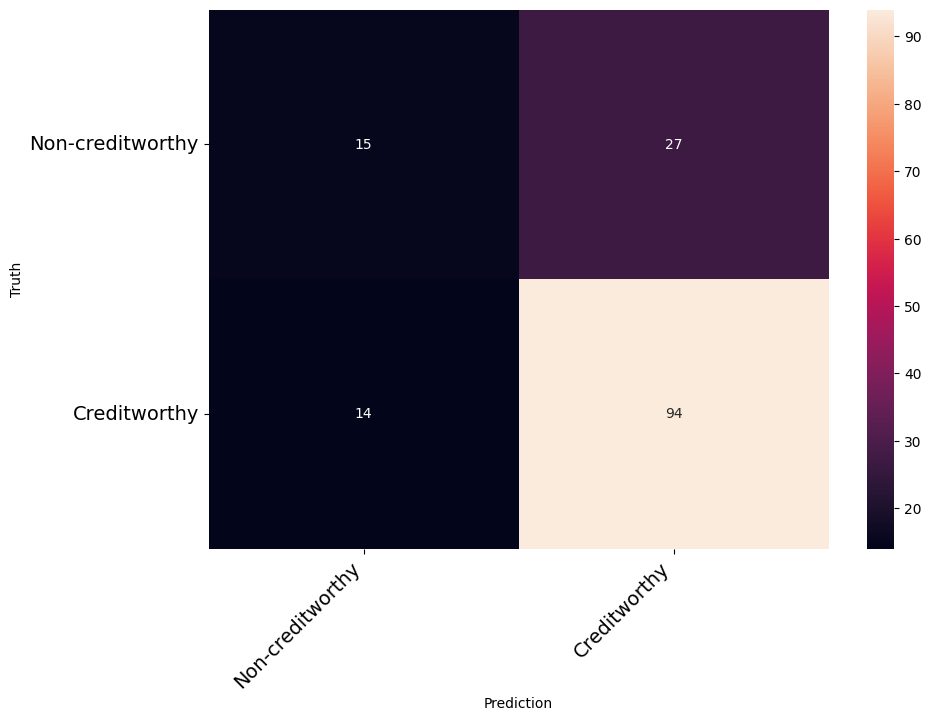

In [88]:

cm_f = confusion_matrix(f_truth, f_prediction)
print_confusion_matrix(cm_f,['Non-creditworthy','Creditworthy'])

In [89]:
print(classification_report(f_truth, f_prediction))

              precision    recall  f1-score   support

           0       0.52      0.36      0.42        42
           1       0.78      0.87      0.82       108

    accuracy                           0.73       150
   macro avg       0.65      0.61      0.62       150
weighted avg       0.70      0.73      0.71       150



In [90]:
bf_truth = Y_test_bf
bf_prediction = boost_model.predict(X_test_bf)

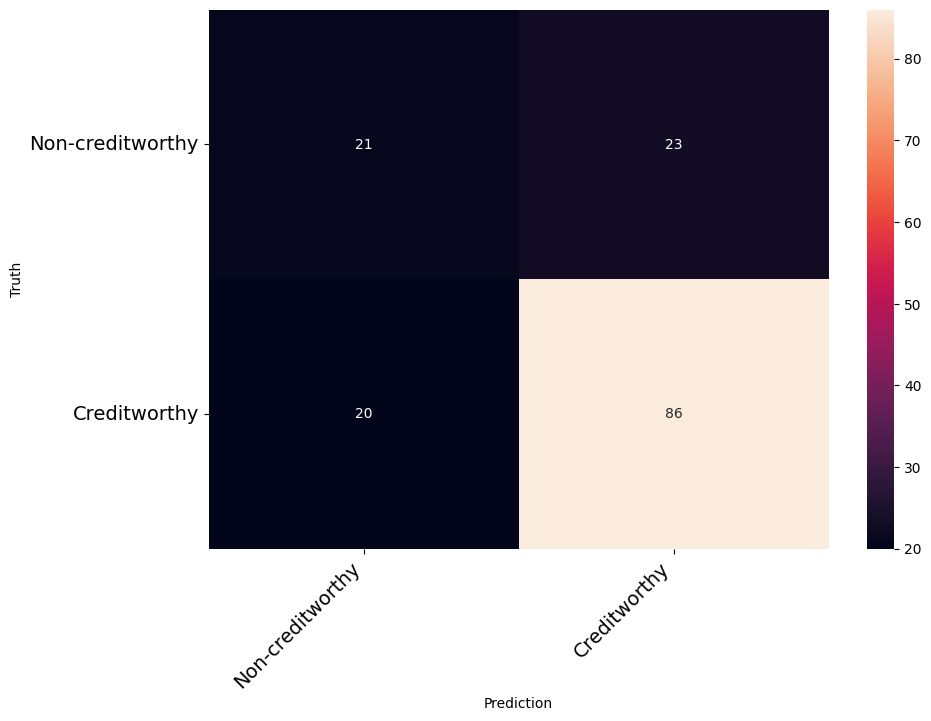

In [91]:

cm_bf = confusion_matrix(bf_truth, bf_prediction)
print_confusion_matrix(cm_bf,['Non-creditworthy','Creditworthy'])

In [92]:
print(classification_report(bf_truth, bf_prediction))

              precision    recall  f1-score   support

           0       0.51      0.48      0.49        44
           1       0.79      0.81      0.80       106

    accuracy                           0.71       150
   macro avg       0.65      0.64      0.65       150
weighted avg       0.71      0.71      0.71       150

